In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from models.logistic_regression import LogisticRegressionCustom
import seaborn as sns

In [560]:
df = pd.read_csv(r'data/heart_attack_cleaned.csv')

In [561]:
df

,age,gender,heart_rate,systolic_bp,diastolic_bp,glucose,ck_mb,troponin,hasDisease
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [562]:
w = np.zeros(shape=(1, 8))

In [563]:
X = df.drop('hasDisease', axis=1)
Y = df['hasDisease']

In [564]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [565]:
model = LogisticRegressionCustom()

In [566]:
model.fit(X_train, Y_train)

In [567]:
Y_pred = model.predict(X_test)

In [568]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, roc_auc_score

In [ ]:
accuracy_score(Y_test, Y_pred) # 0.8090909090909091

0.8090909090909091

In [ ]:
precision_score(Y_test, Y_pred) # 0.8894472361809045

0.8894472361809045

In [ ]:
recall_score(Y_test, Y_pred) # 0.8119266055045872

0.8119266055045872

In [ ]:
f1_score(Y_test, Y_pred) # 0.8489208633093526

0.8489208633093526

In [573]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 90,  22],
       [ 41, 177]])

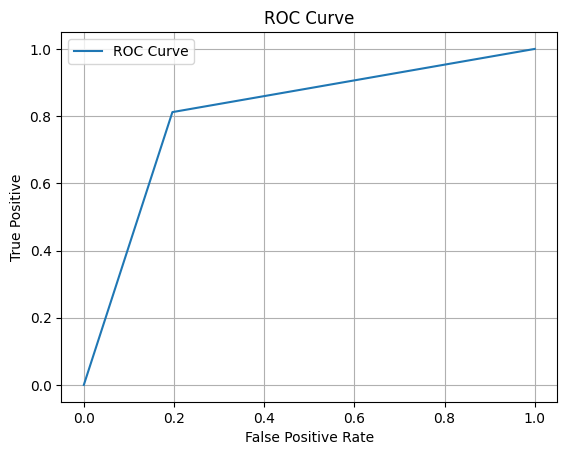

In [580]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive')
plt.legend()
plt.title('ROC Curve')
plt.savefig("results/roc_curve.png", dpi=300)
plt.grid(True)

plt.show()

In [575]:
roc_auc_score(Y_test, Y_pred) # 0.7898544931244004

0.8077490170380078

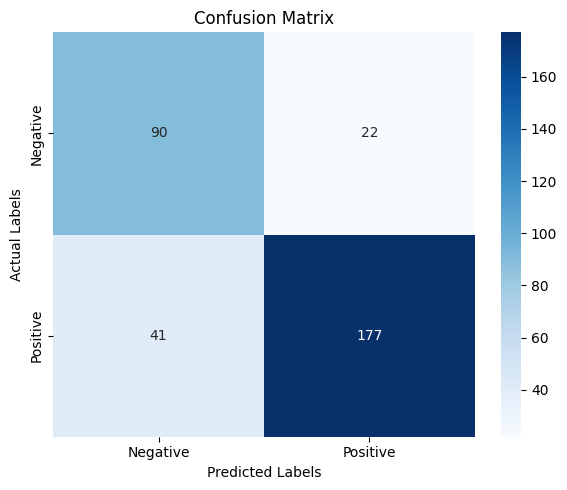

In [581]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("results/confusion_matrix.png", dpi=300)
plt.show()